In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def lolipop_plot(ax, x, y):
    markerline, stemlines, baseline = ax.stem(x, y)
    plt.setp(markerline, 'markerfacecolor', 'b')
    plt.setp(baseline, 'color','r', 'linewidth', 2) 

Consider the bendy curve below.

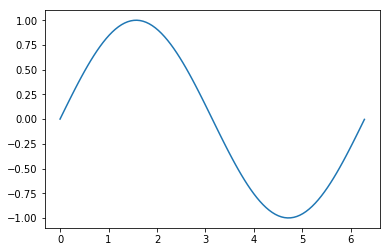

In [19]:
x = np.linspace(0, 6.28, 100)
y = np.sin(x)

plt.plot(x, y)


Now let us look at some of the properties of the below curve with our approximation scheme.

1. First we approximate the space by capturing the solution only at a limited number of points.
2. We calculate the changes between the adjacent points, (remember from the previous assignments that changes is crucial to slope.)
3. 

In [25]:
def plot_slope_bendiness(dx):
    x_continuous = np.linspace(0, 6.28, 1000)
    y_continuous = np.sin(x_continuous)
    
    x_discrete = np.arange(0, 6.28, dx)
    y_discrete = np.sin(x_discrete)
    
    changes = y_discrete[1:]-y_discrete[:-1]
    slopes = changes/dx
    
    change_of_slopes = slopes[1:]-slopes[:-1]
    slope_of_slopes = change_of_slopes/dx
    
    f, axarr = plt.subplots(6, sharex=True, sharey=True)
    f.set_figheight(15)
    f.set_figwidth(15)
    axarr[0].plot(x_continuous, y_continuous)
    axarr[0].set_title('Continous curve')
    axarr[1].plot(x_discrete, y_discrete, 'o', markersize=4)
    axarr[1].set_title('Discretized function')
    lolipop_plot(axarr[2], x_discrete[1:], changes)
    axarr[2].set_title('Change between the discrete points')
    lolipop_plot(axarr[3], x_discrete[1:], slopes)
    axarr[3].set_title('Slopes at the discrete points')
    lolipop_plot(axarr[4], x_discrete[1:-1], change_of_slopes)
    axarr[4].set_title('Change between the discrete slopes.')
    lolipop_plot(axarr[5], x_discrete[1:-1], slope_of_slopes)
    axarr[5].set_title('Slope of slopes at the discrete points.')

    
interact(plot_slope_bendiness,
            dx=widgets.FloatSlider(min=0.1, max=1, step=0.05, value=0.5, continuous_update=False))
    

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='dx', max=1.0, min=0.1, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_slope_bendiness>